In [2]:
rm(list=ls())
# dependencies
Sys.setenv(LANG = "en")
Sys.setenv(JAVA_HOME = "C:\\Program Files\\Java\\jre1.8.0_261")
library(readr)
library(ggplot2)
library(ggcorrplot)
library(dplyr)
library(dummies)
library(fastDummies)
library(olsrr)
library(rJava)
library(glmulti)
library(stargazer)
library(car)
library("lmtest")
library("tseries")
library("sandwich")



library("MASS")
library("sandwich")
library("zoo")
library("car")
library("lmtest")
library("Formula")
library("plm")
library("stargazer")


df <- read_csv("../../data/main_research/processed_data/final_dataset.csv")

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

dummies-1.5.6 provided by Decision Patterns

Warning message:
"package 'fastDummies' was built under R version 3.6.3"Warning message:
"package 'olsrr' was built under R version 3.6.3"
Attaching package: 'olsrr'

The following object is masked from 'package:datasets':

    rivers

Warning message:
"package 'rJava' was built under R version 3.6.3"Warning message:
"package 'glmulti' was built under R version 3.6.3"Loading required package: leaps

Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 

Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:

In [18]:
head(df)

country_name,region_geo,income_group,pandem,pandem_dis,panback,rule,polyarchy,education,gini,density,gdp_pc,inflation,oil,mineral,trade_gdp,ethnic_frac,ling_frac,relig_frac
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,14,Low income,0.05882353,0.05,0.00000000,0.341,0.347,3.813,27.8,56.93776,502.1155,2.302373,0.001254688,0.007420852,45.62118,0.7693,0.6141,0.2717
Albania,3,Upper middle income,0.17647059,0.15,0.17310988,0.596,0.481,NA,33.2,104.61226,5352.8574,1.411091,1.365752443,0.146426288,76.72830,0.2204,0.0400,0.4719
Algeria,5,Lower middle income,0.29411765,0.35,0.12334000,0.217,0.300,7.300,27.6,17.73008,3948.3433,1.951768,12.313696685,0.046716900,52.04477,0.3394,0.4427,0.0100
Angola,7,Lower middle income,0.11764706,0.10,0.04167059,0.406,0.386,2.980,51.3,24.71305,2973.5912,17.145320,15.753913421,0.000000000,66.37801,0.7867,0.7870,0.6276
Argentina,18,Upper middle income,0.05882353,0.05,0.05478565,0.757,0.812,8.770,41.4,16.25851,10006.1490,53.548304,0.735824027,0.308309752,32.39367,0.2550,0.0620,0.2236
Armenia,10,Upper middle income,0.17647059,0.15,0.16243694,0.800,0.805,10.818,34.4,103.68022,4622.7335,1.443447,0.000000000,5.590611662,91.43229,0.1272,0.1291,0.4576


In [3]:
# Dataset preparation
## Removing redundant variables
# df$country_name <- NULL
df$country_text_id <- NULL
df$continent <- NULL
df$sub_region <- NULL
df$region_pol <- NULL

In [4]:
## Dummies
data <- fastDummies::dummy_cols(df,select_columns = c("income_group","region_geo"),remove_most_frequent_dummy = TRUE, remove_selected_columns = TRUE)

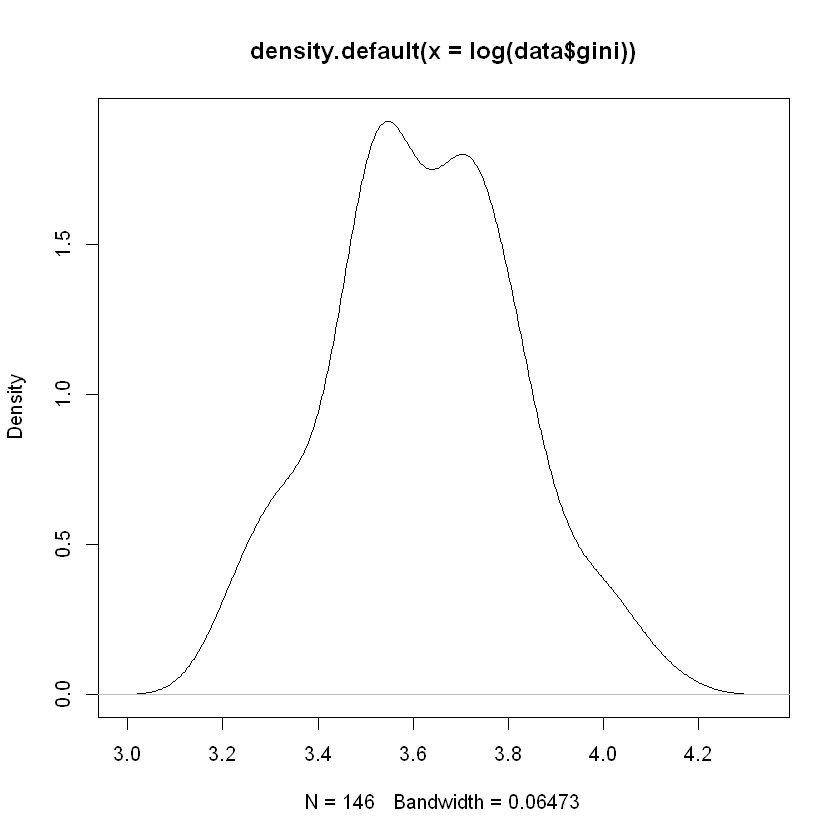

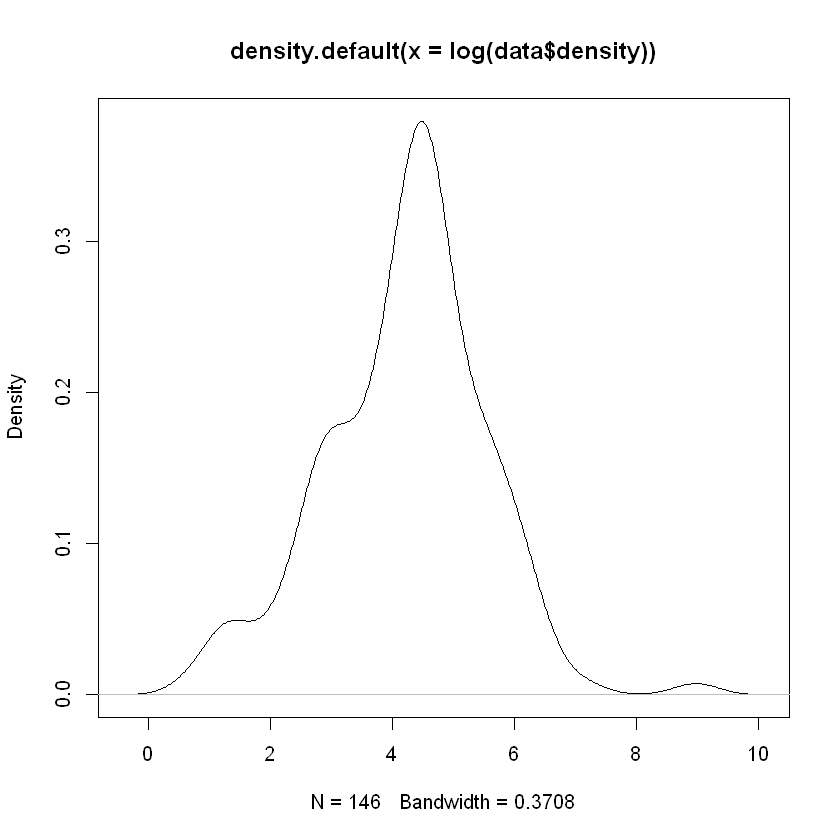

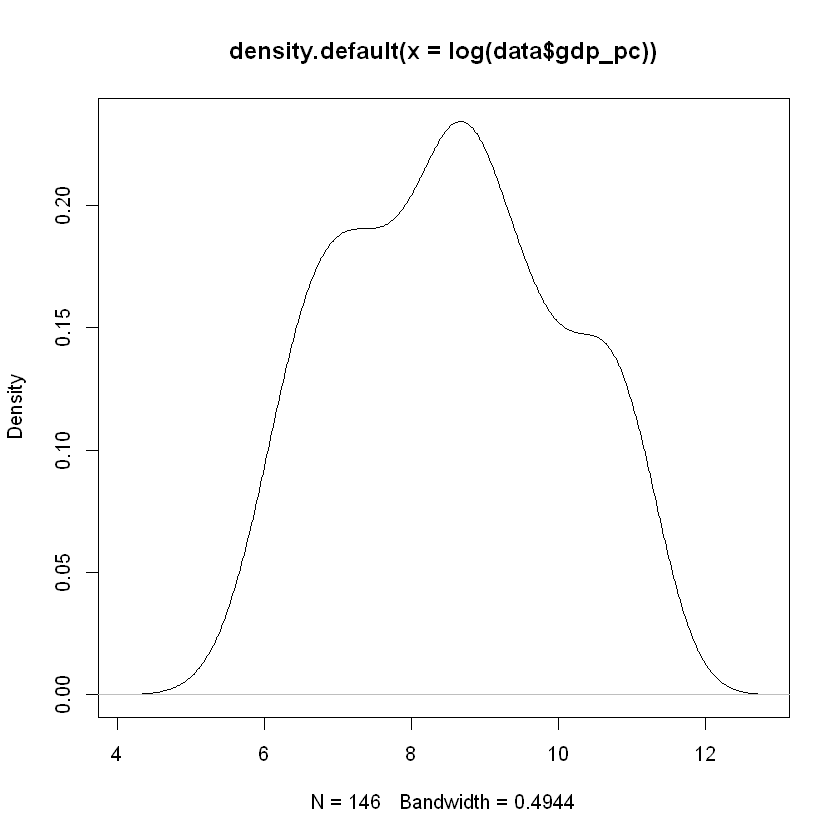

[1] "country_name"                     "pandem"                          
 [3] "pandem_dis"                       "panback"                         
 [5] "rule"                             "polyarchy"                       
 [7] "education"                        "gini"                            
 [9] "density"                          "gdp_pc"                          
[11] "inflation"                        "oil"                             
[13] "mineral"                          "trade_gdp"                       
[15] "ethnic_frac"                      "ling_frac"                       
[17] "relig_frac"                       "income_group_Low income"         
[19] "income_group_Lower middle income" "income_group_Upper middle income"
[21] "region_geo_1"                     "region_geo_11"                   
[23] "region_geo_12"                    "region_geo_13"                   
[25] "region_geo_14"                    "region_geo_15"                   
[27] "region_geo_16"                    "region_geo_17"                   
[29] "region_geo_18"                    "region_geo_19"                   
[31] "region_geo_2"                     "region_geo_3"                    
[33] "region_geo_4"                     "region_geo_5"                    
[35] "region_geo_6"                     "region_geo_7"                    
[37] "region_geo_8"                     "region_geo_9"                    
[39] "gini_log"                         "density_log"                     
[41] "gdp_pc_log"                       "trade_gdp_log"

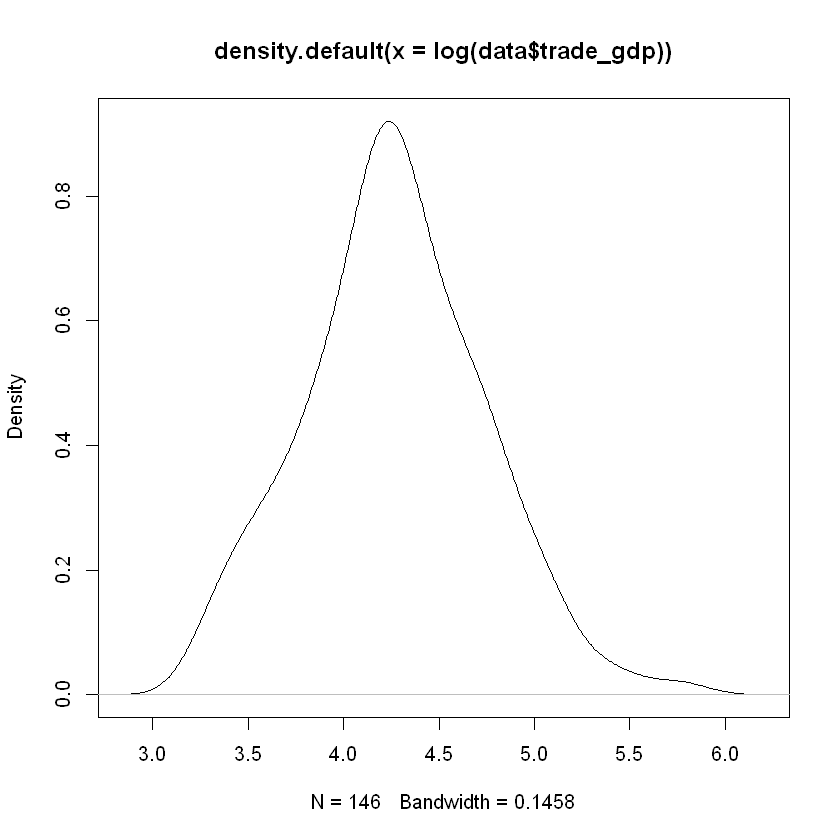

In [9]:
## Simple feature eng.
plot(density(log(data$gini))); data$gini_log <- log(data$gini) 
plot(density(log(data$density))); data$density_log <- log(data$density) 
plot(density(log(data$gdp_pc))); data$gdp_pc_log <- log(data$gdp_pc) 
plot(density(log(data$trade_gdp))); data$trade_gdp_log <- log(data$trade_gdp) 

colnames(data)

# 1) OLS with all variables

In [14]:
##############################################
##############################################
#### y=panback, region_geo as regional variable

model_panback_1 <- lm(panback ~ rule + polyarchy + education + ethnic_frac + ling_frac + relig_frac + gdp_pc_log + gini_log + inflation + trade_gdp_log + oil + mineral + density_log + region_geo_1 + region_geo_2 + region_geo_3 + region_geo_4 + region_geo_5 + region_geo_6 + region_geo_7 + region_geo_8 + region_geo_9 + region_geo_11 + region_geo_12 + region_geo_13 + region_geo_14 + region_geo_15 + region_geo_16 + region_geo_17 + region_geo_18 + region_geo_19 + `income_group_Low income` + `income_group_Lower middle income` + `income_group_Upper middle income`, data = data)
# olsrr::ols_coll_diag(model_panback_1)
olsrr::ols_test_normality(model_panback_1)
resettest(model_panback_1, power=2:3, type="fitted")
bptest(model_panback_1, studentize=TRUE)
dwtest(model_panback_1)

-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9803         0.0631 
Kolmogorov-Smirnov        0.0614         0.7294 
Cramer-von Mises         35.4723         0.0000 
Anderson-Darling          0.6453         0.0903 
-----------------------------------------------


	RESET test

data:  model_panback_1
RESET = 5.8218, df1 = 2, df2 = 89, p-value = 0.004206



	studentized Breusch-Pagan test

data:  model_panback_1
BP = 38.171, df = 34, p-value = 0.2855



	Durbin-Watson test

data:  model_panback_1
DW = 2.0166, p-value = 0.4889
alternative hypothesis: true autocorrelation is greater than 0


In [15]:
##############################################
##############################################
#### y=pandem, region_geo as regional variable

model_pandem_1 <- lm(pandem ~ rule + polyarchy + education + ethnic_frac + ling_frac + relig_frac + gdp_pc_log + gini_log + inflation + trade_gdp_log + oil + mineral + density_log + region_geo_1 + region_geo_2 + region_geo_3 + region_geo_4 + region_geo_5 + region_geo_6 + region_geo_7 + region_geo_8 + region_geo_9 + region_geo_11 + region_geo_12 + region_geo_13 + region_geo_14 + region_geo_15 + region_geo_16 + region_geo_17 + region_geo_18 + region_geo_19 + `income_group_Low income` + `income_group_Lower middle income` + `income_group_Upper middle income`, data = data)
# olsrr::ols_coll_diag(model_pandem_1)
olsrr::ols_test_normality(model_pandem_1)
resettest(model_pandem_1, power=2:3, type="fitted")
bptest(model_pandem_1, studentize=TRUE)
dwtest(model_pandem_1)

-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.989          0.4128 
Kolmogorov-Smirnov        0.0511         0.8971 
Cramer-von Mises         34.4655         0.0000 
Anderson-Darling          0.4132         0.3330 
-----------------------------------------------


	RESET test

data:  model_pandem_1
RESET = 0.35663, df1 = 2, df2 = 89, p-value = 0.701



	studentized Breusch-Pagan test

data:  model_pandem_1
BP = 46.372, df = 34, p-value = 0.07664



	Durbin-Watson test

data:  model_pandem_1
DW = 2.1663, p-value = 0.7937
alternative hypothesis: true autocorrelation is greater than 0


In [16]:
##############################################
##############################################
#### y=pandem_dis, region_geo as regional variable

model_pandem_dis_1 <- lm(pandem_dis ~ rule + polyarchy + education + ethnic_frac + ling_frac + relig_frac + gdp_pc_log + gini_log + inflation + trade_gdp_log + oil + mineral + density_log + region_geo_1 + region_geo_2 + region_geo_3 + region_geo_4 + region_geo_5 + region_geo_6 + region_geo_7 + region_geo_8 + region_geo_9 + region_geo_11 + region_geo_12 + region_geo_13 + region_geo_14 + region_geo_15 + region_geo_16 + region_geo_17 + region_geo_18 + region_geo_19 + `income_group_Low income` + `income_group_Lower middle income` + `income_group_Upper middle income`, data = data)
# olsrr::ols_coll_diag(model_pandem_dis_1)
olsrr::ols_test_normality(model_pandem_dis_1)
resettest(model_pandem_dis_1, power=2:3, type="fitted")
bptest(model_pandem_dis_1, studentize=TRUE)
dwtest(model_pandem_dis_1)

-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9852         0.1863 
Kolmogorov-Smirnov        0.0537         0.8602 
Cramer-von Mises         35.0222         0.0000 
Anderson-Darling          0.3812         0.3960 
-----------------------------------------------


	RESET test

data:  model_pandem_dis_1
RESET = 1.5465, df1 = 2, df2 = 89, p-value = 0.2187



	studentized Breusch-Pagan test

data:  model_pandem_dis_1
BP = 45.922, df = 34, p-value = 0.08325



	Durbin-Watson test

data:  model_pandem_dis_1
DW = 2.2918, p-value = 0.937
alternative hypothesis: true autocorrelation is greater than 0


In [13]:
stargazer(model_panback_1, model_pandem_1, model_pandem_dis_1, type="text")


                                        Dependent variable:     
                                   -----------------------------
                                    panback   pandem  pandem_dis
                                      (1)      (2)       (3)    
----------------------------------------------------------------
rule                                 0.018    -0.003    0.001   
                                    (0.074)  (0.084)   (0.078)  
                                                                
polyarchy                           0.176*    -0.134    -0.136  
                                    (0.095)  (0.108)   (0.100)  
                                                                
education                           -0.003    -0.001    0.001   
                                    (0.009)  (0.010)   (0.009)  
                                                                
ethnic_frac                          0.006    -0.035    -0.022  
                        

In [ ]:


##############################################
##############################################
#### y=panback, region_geo as regional variable

model_panback_1 <- lm(panback ~ rule + education + ethnic_frac + ling_frac + relig_frac + gdp_pc_log + gini_log + inflation + trade_gdp_log + oil + mineral + density_log + region_geo_1 + region_geo_2 + region_geo_3 + region_geo_4 + region_geo_5 + region_geo_6 + region_geo_7 + region_geo_8 + region_geo_9 + region_geo_11 + region_geo_12 + region_geo_13 + region_geo_14 + region_geo_15 + region_geo_16 + region_geo_17 + region_geo_18 + region_geo_19 + `income_group_Low income` + `income_group_Lower middle income` + `income_group_Upper middle income`, data = data)
olsrr::ols_coll_diag(model_panback_1)
olsrr::ols_test_normality(model_panback_1)
resettest(model_panback_1, power=2:3, type="fitted")
bptest(model_panback_1, studentize=TRUE)
dwtest(model_panback_1)

model_panback_2 <- lm(panback ~ polyarchy + education + ethnic_frac + ling_frac + relig_frac + gdp_pc_log + gini_log + inflation + trade_gdp_log + oil + mineral + density_log + region_geo_1 + region_geo_2 + region_geo_3 + region_geo_4 + region_geo_5 + region_geo_6 + region_geo_7 + region_geo_8 + region_geo_9 + region_geo_11 + region_geo_12 + region_geo_13 + region_geo_14 + region_geo_15 + region_geo_16 + region_geo_17 + region_geo_18 + region_geo_19 + `income_group_Low income` + `income_group_Lower middle income` + `income_group_Upper middle income`, data = data)
olsrr::ols_coll_diag(model_panback_2)
olsrr::ols_test_normality(model_panback_2)
resettest(model_panback_2, power=2:3, type="fitted")
bptest(model_panback_2, studentize=TRUE)
dwtest(model_panback_2)




##############################################
##############################################
#### y=pandem, region_geo as regional variable

model_pandem_1 <- lm(pandem ~ rule + education + ethnic_frac + ling_frac + relig_frac + gdp_pc_log + gini_log + inflation + trade_gdp_log + oil + mineral + density_log + region_geo_1 + region_geo_2 + region_geo_3 + region_geo_4 + region_geo_5 + region_geo_6 + region_geo_7 + region_geo_8 + region_geo_9 + region_geo_11 + region_geo_12 + region_geo_13 + region_geo_14 + region_geo_15 + region_geo_16 + region_geo_17 + region_geo_18 + region_geo_19 + `income_group_Low income` + `income_group_Lower middle income` + `income_group_Upper middle income`, data = data)
olsrr::ols_coll_diag(model_pandem_1)
olsrr::ols_test_normality(model_pandem_1)
resettest(model_pandem_1, power=2:3, type="fitted")
bptest(model_pandem_1, studentize=TRUE)
dwtest(model_pandem_1)

model_pandem_2 <- lm(pandem ~ polyarchy + education + ethnic_frac + ling_frac + relig_frac + gdp_pc_log + gini_log + inflation + trade_gdp_log + oil + mineral + density_log + region_geo_1 + region_geo_2 + region_geo_3 + region_geo_4 + region_geo_5 + region_geo_6 + region_geo_7 + region_geo_8 + region_geo_9 + region_geo_11 + region_geo_12 + region_geo_13 + region_geo_14 + region_geo_15 + region_geo_16 + region_geo_17 + region_geo_18 + region_geo_19 + `income_group_Low income` + `income_group_Lower middle income` + `income_group_Upper middle income`, data = data)
olsrr::ols_coll_diag(model_pandem_2)
olsrr::ols_test_normality(model_pandem_2)
resettest(model_pandem_2, power=2:3, type="fitted")
bptest(model_pandem_2, studentize=TRUE)
dwtest(model_pandem_2)



##############################################
##############################################
#### y=pandem_dis, region_geo as regional variable

model_pandem_dis_1 <- lm(pandem_dis ~ rule + education + ethnic_frac + ling_frac + relig_frac + gdp_pc_log + gini_log + inflation + trade_gdp_log + oil + mineral + density_log + region_geo_1 + region_geo_2 + region_geo_3 + region_geo_4 + region_geo_5 + region_geo_6 + region_geo_7 + region_geo_8 + region_geo_9 + region_geo_11 + region_geo_12 + region_geo_13 + region_geo_14 + region_geo_15 + region_geo_16 + region_geo_17 + region_geo_18 + region_geo_19 + `income_group_Low income` + `income_group_Lower middle income` + `income_group_Upper middle income`, data = data)
olsrr::ols_coll_diag(model_pandem_dis_1)
olsrr::ols_test_normality(model_pandem_dis_1)
resettest(model_pandem_dis_1, power=2:3, type="fitted")
bptest(model_pandem_dis_1, studentize=TRUE)
dwtest(model_pandem_dis_1)

model_pandem_dis_2 <- lm(pandem_dis ~ polyarchy + education + ethnic_frac + ling_frac + relig_frac + gdp_pc_log + gini_log + inflation + trade_gdp_log + oil + mineral + density_log + region_geo_1 + region_geo_2 + region_geo_3 + region_geo_4 + region_geo_5 + region_geo_6 + region_geo_7 + region_geo_8 + region_geo_9 + region_geo_11 + region_geo_12 + region_geo_13 + region_geo_14 + region_geo_15 + region_geo_16 + region_geo_17 + region_geo_18 + region_geo_19 + `income_group_Low income` + `income_group_Lower middle income` + `income_group_Upper middle income`, data = data)
olsrr::ols_coll_diag(model_pandem_dis_2)
olsrr::ols_test_normality(model_pandem_dis_2)
resettest(model_pandem_dis_2, power=2:3, type="fitted")
bptest(model_pandem_dis_2, studentize=TRUE)
dwtest(model_pandem_dis_2)

stargazer(model_panback_1, model_pandem_1, model_pandem_dis_1, type="html", out="wo_military/all_rule_variables.html")
stargazer(model_panback_2, model_pandem_2, model_pandem_dis_2, type="html", out="wo_military/all_polyarchy_variables.html")



############# BEZ FE
##############################################
##############################################
#### y=panback, region_geo as regional variable

model_panback_1 <- lm(panback ~ rule + polyarchy + education + ethnic_frac + ling_frac + relig_frac + gdp_pc_log + gini_log + inflation + trade_gdp_log + oil + mineral + density_log, data = data)
olsrr::ols_coll_diag(model_panback_1)
olsrr::ols_test_normality(model_panback_1)
resettest(model_panback_1, power=2:3, type="fitted")
bptest(model_panback_1, studentize=TRUE)
dwtest(model_panback_1)

model_panback_2 <- lm(panback ~ rule + education + ethnic_frac + ling_frac + relig_frac + gdp_pc_log + gini_log + inflation + trade_gdp_log + oil + mineral + density_log, data = data)
olsrr::ols_coll_diag(model_panback_2)
olsrr::ols_test_normality(model_panback_2)
resettest(model_panback_2, power=2:3, type="fitted")
bptest(model_panback_2, studentize=TRUE)
dwtest(model_panback_2)

model_panback_3 <- lm(panback ~ polyarchy + education + ethnic_frac + ling_frac + relig_frac + gdp_pc_log + gini_log + inflation + trade_gdp_log + oil + mineral + density_log, data = data)
olsrr::ols_coll_diag(model_panback_3)
olsrr::ols_test_normality(model_panback_3)
resettest(model_panback_3, power=2:3, type="fitted")
bptest(model_panback_3, studentize=TRUE)
dwtest(model_panback_3)


##############################################
##############################################
#### y=pandem, region_geo as regional variable

model_pandem_1 <- lm(pandem ~ rule + polyarchy + education + ethnic_frac + ling_frac + relig_frac + gdp_pc_log + gini_log + inflation + trade_gdp_log + oil + mineral + density_log, data = data)
olsrr::ols_coll_diag(model_pandem_1)
olsrr::ols_test_normality(model_pandem_1)
resettest(model_pandem_1, power=2:3, type="fitted")
bptest(model_pandem_1, studentize=TRUE)
dwtest(model_pandem_1)

model_pandem_2 <- lm(pandem ~ rule + education + ethnic_frac + ling_frac + relig_frac + gdp_pc_log + gini_log + inflation + trade_gdp_log + oil + mineral + density_log, data = data)
olsrr::ols_coll_diag(model_pandem_2)
olsrr::ols_test_normality(model_pandem_2)
resettest(model_pandem_2, power=2:3, type="fitted")
bptest(model_pandem_2, studentize=TRUE)
dwtest(model_pandem_2)
robust_pandem_2 = coeftest(model_pandem_2, vcov=vcovHC(model_pandem_2, type="HC0"))
show(robust_pandem_2)

model_pandem_3 <- lm(pandem ~ polyarchy + education + ethnic_frac + ling_frac + relig_frac + gdp_pc_log + gini_log + inflation + trade_gdp_log + oil + mineral + density_log, data = data)
olsrr::ols_coll_diag(model_pandem_3)
olsrr::ols_test_normality(model_pandem_3)
resettest(model_pandem_3, power=2:3, type="fitted")
bptest(model_pandem_3, studentize=TRUE)
dwtest(model_pandem_3)


##############################################
##############################################
#### y=pandem_dis, region_geo as regional variable

model_pandem_dis_1 <- lm(pandem_dis ~ rule + polyarchy + education + ethnic_frac + ling_frac + relig_frac + gdp_pc_log + gini_log + inflation + trade_gdp_log + oil + mineral + density_log, data = data)
olsrr::ols_coll_diag(model_pandem_dis_1)
olsrr::ols_test_normality(model_pandem_dis_1)
resettest(model_pandem_dis_1, power=2:3, type="fitted")
bptest(model_pandem_dis_1, studentize=TRUE)
dwtest(model_pandem_dis_1)

model_pandem_dis_2 <- lm(pandem_dis ~ rule + education + ethnic_frac + ling_frac + relig_frac + gdp_pc_log + gini_log + inflation + trade_gdp_log + oil + mineral + density_log, data = data)
olsrr::ols_coll_diag(model_pandem_dis_2)
olsrr::ols_test_normality(model_pandem_dis_2)
resettest(model_pandem_dis_2, power=2:3, type="fitted")
bptest(model_pandem_dis_2, studentize=TRUE)
dwtest(model_pandem_dis_2)
robust_pandem_dis_2 = coeftest(model_pandem_dis_2, vcov=vcovHC(model_pandem_dis_2, type="HC0"))
show(robust_pandem_dis_2)

model_pandem_dis_3 <- lm(pandem_dis ~ polyarchy + education + ethnic_frac + ling_frac + relig_frac + gdp_pc_log + gini_log + inflation + trade_gdp_log + oil + mineral + density_log, data = data)
olsrr::ols_coll_diag(model_pandem_dis_3)
olsrr::ols_test_normality(model_pandem_dis_3)
resettest(model_pandem_dis_3, power=2:3, type="fitted")
bptest(model_pandem_dis_3, studentize=TRUE)
dwtest(model_pandem_dis_3)




stargazer(model_panback_1, model_pandem_1, model_pandem_dis_1, type="html", out="wo_military/all_fe.html")
stargazer(model_panback_2, model_pandem_2, model_pandem_dis_2, type="html", out="wo_military/all_rule_fe.html")
stargazer(model_panback_2, robust_pandem_2, robust_pandem_dis_2, type="html", out="wo_military/all_rule_fe_robust.html")
stargazer(model_panback_3, model_pandem_3, model_pandem_dis_3, type="html", out="wo_military/all_poly_fe.html")
